In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# inline表示将图表嵌入到Notebook中
%matplotlib inline

In [5]:
train_data = pd.read_csv('../titanic/data/train.csv')
test_data = pd.read_csv('../titanic/data/test.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_data.isnull().sum() # try to fix

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing the features

### sex

In [12]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

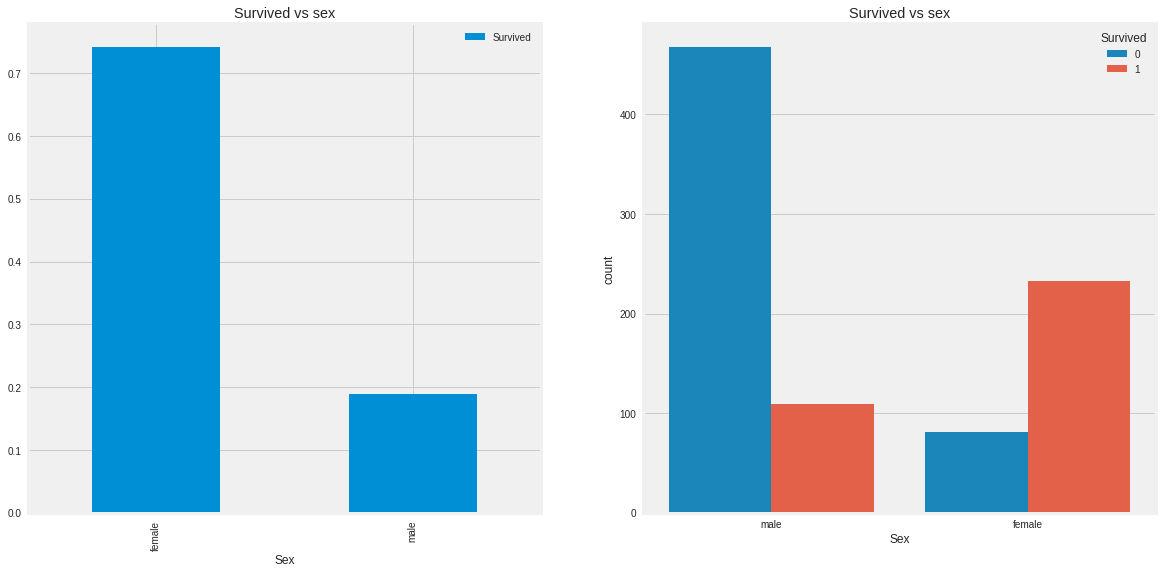

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,9))
#train_data[['Sex','Survived']].groupby(['Sex']).mean().plot().bar(ax = ax[0])
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs sex')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived vs sex')
plt.show()

## Pclass

In [14]:
# pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


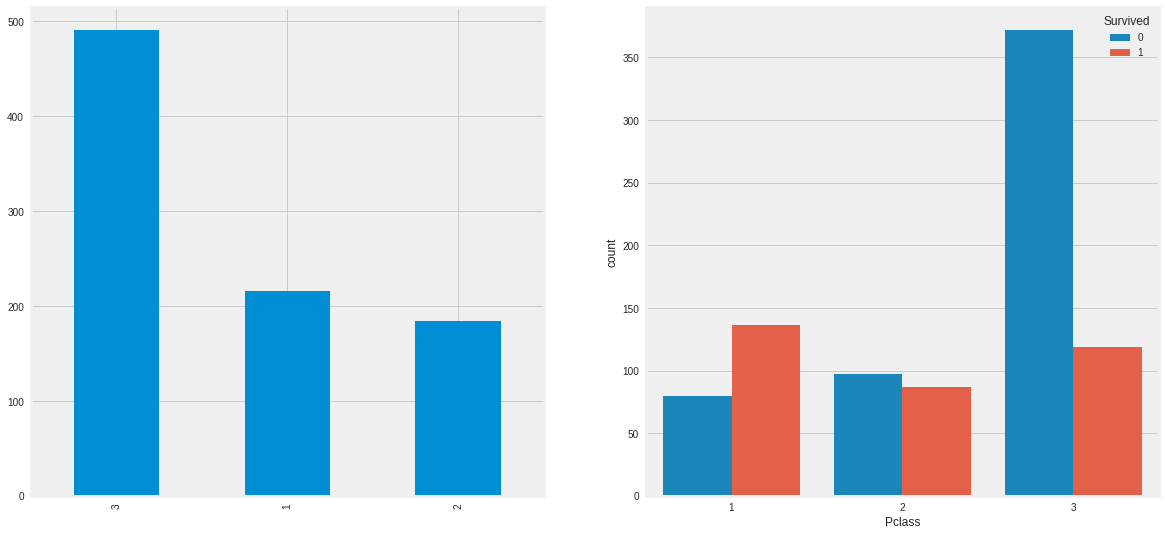

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,9))
train_data['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1])
plt.show()

In [16]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Pclass</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
    </tr>
    <tr>
      <th>Sex</th>
      <th>Survived</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">female</th>
      <th>0</th>
      <td>3</td>
      <td>6</td>
      <td>72</td>
    </tr>
    <tr>
      <th>1</th>
      <td>91</td>
      <td>70</td>
      <td>72</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">male</th>
      <th>0</th>
      <td>77</td>
      <td>91</td>
      <td>300</td>
    </tr>
    <tr>
      <th>1</th>
      <td>45</td>
      <td>17</td>
      <td>47</td>
    </tr>
  </tbody>
</table>
</div>

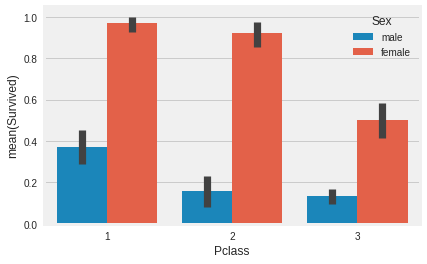

In [17]:
sns.barplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()

##Age

In [18]:
f,ax = plt.subplots(1,2,figsize=(18,9))
sns.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_yticks(range(0,100,10))
sns.violinplot('Sex','Age',hue='Survived',data=train_data,split=True,ax=ax[1])
ax[1].set_yticks(range(0,100,10))
plt.show()

In [19]:
train_data['Initial'] = 0
for data in train_data:
    train_data['Initial'] = train_data.Name.str.extract('([A-Za-z]+)\.')

/home/zhiyedan/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
pd.crosstab(train_data.Sex,train_data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
train_data.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [23]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

In [24]:
train_data.Age.isnull().any()

False

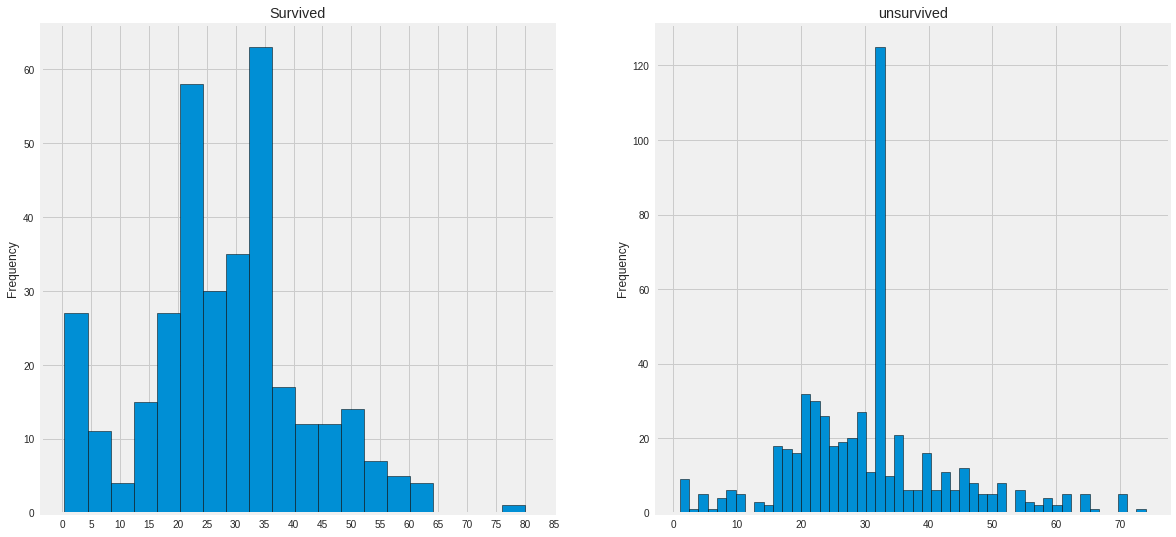

In [37]:
f,ax = plt.subplots(1,2,figsize=(18,9))
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[0],edgecolor='black',bins=20)
ax[0].set_title('Survived')
ax[0].set_xticks(list(range(0,90,5)))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[1],edgecolor='black',bins=50)
ax[1].set_title('unsurvived')
plt.show()

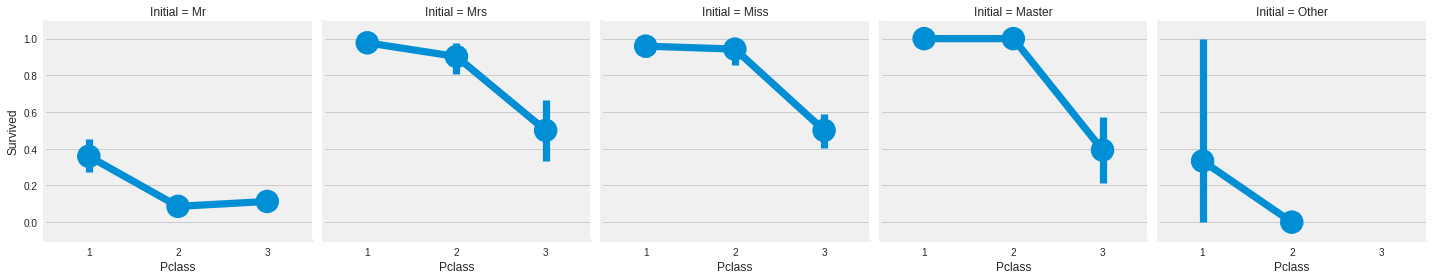

In [39]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_data)
plt.show()

### Embarked

In [42]:
pd.crosstab([train_data.Embarked,train_data.Pclass],[train_data.Sex,train_data.Survived],margins=True)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>Sex</th>
      <th colspan="2" halign="left">female</th>
      <th colspan="2" halign="left">male</th>
      <th>All</th>
    </tr>
    <tr>
      <th></th>
      <th>Survived</th>
      <th>0</th>
      <th>1</th>
      <th>0</th>
      <th>1</th>
      <th></th>
    </tr>
    <tr>
      <th>Embarked</th>
      <th>Pclass</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">C</th>
      <th>1</th>
      <td>1</td>
      <td>42</td>
      <td>25</td>
      <td>17</td>
      <td>85</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>7</td>
      <td>8</td>
      <td>2</td>
      <td>17</td>
    </tr>
    <tr>
      <th>3</th>
      <td>8</td>
      <td>15</td>
      <td>33</td>
      <td>10</td>
      <td>66</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Q</th>
      <th>1</th>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>0</td>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>9</td>
      <td>24</td>
      <td>36</td>
      <td>3</td>
      <td>72</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">S</th>
      <th>1</th>
      <td>2</td>
      <td>46</td>
      <td>51</td>
      <td>28</td>
      <td>127</td>
    </tr>
    <tr>
      <th>2</th>
      <td>6</td>
      <td>61</td>
      <td>82</td>
      <td>15</td>
      <td>164</td>
    </tr>
    <tr>
      <th>3</th>
      <td>55</td>
      <td>33</td>
      <td>231</td>
      <td>34</td>
      <td>353</td>
    </tr>
    <tr>
      <th>All</th>
      <th></th>
      <td>81</td>
      <td>231</td>
      <td>468</td>
      <td>109</td>
      <td>889</td>
    </tr>
  </tbody>
</table>
</div>

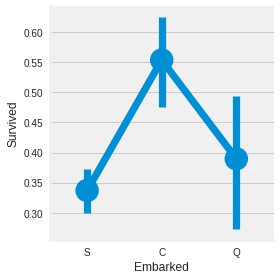

In [44]:
sns.factorplot('Embarked','Survived',data=train_data)
plt.show()

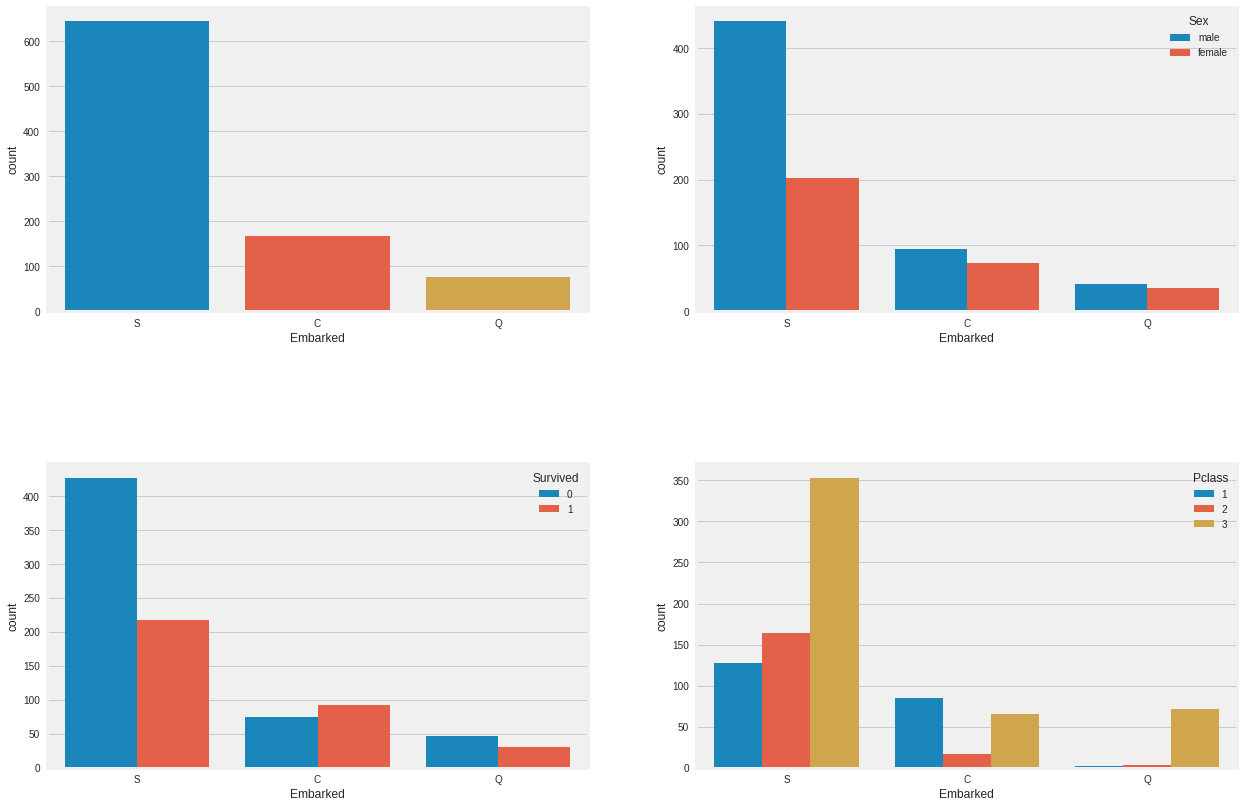

In [52]:
f,ax = plt.subplots(2,2,figsize=(19,14))
sns.countplot('Embarked',data=train_data,ax=ax[0,0])
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0])
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[1,1])
plt.show()

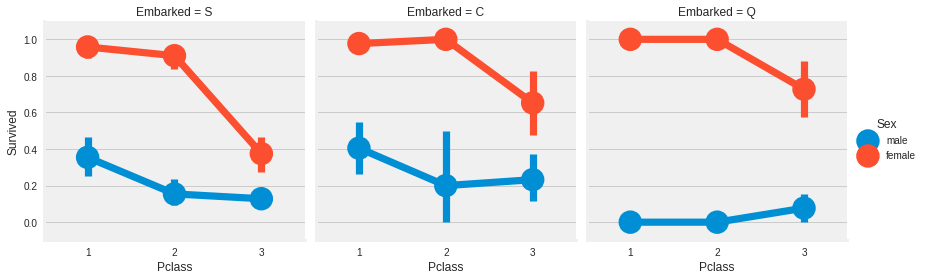

In [55]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data)
plt.show()

### Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [56]:
train_data['Embarked'].fillna('S',inplace=True)

In [60]:
train_data['Embarked'].isnull().any()

False

### SibSip

In [63]:
pd.crosstab(train_data.SibSp,[train_data.Pclass,train_data.Survived])

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Pclass</th>
      <th colspan="2" halign="left">1</th>
      <th colspan="2" halign="left">2</th>
      <th colspan="2" halign="left">3</th>
    </tr>
    <tr>
      <th>Survived</th>
      <th>0</th>
      <th>1</th>
      <th>0</th>
      <th>1</th>
      <th>0</th>
      <th>1</th>
    </tr>
    <tr>
      <th>SibSp</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>60</td>
      <td>77</td>
      <td>70</td>
      <td>50</td>
      <td>268</td>
      <td>83</td>
    </tr>
    <tr>
      <th>1</th>
      <td>18</td>
      <td>53</td>
      <td>23</td>
      <td>32</td>
      <td>56</td>
      <td>27</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>4</td>
      <td>4</td>
      <td>4</td>
      <td>10</td>
      <td>5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2</td>
      <td>0</td>
      <td>1</td>
      <td>11</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>15</td>
      <td>3</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>5</td>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>7</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

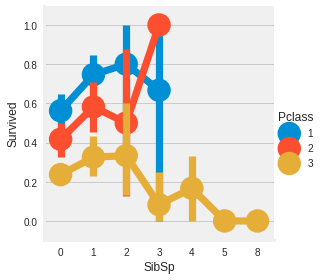

In [65]:
sns.factorplot('SibSp','Survived',hue='Pclass',data=train_data)
plt.show()

### Parch

In [68]:
pd.crosstab(train_data.Parch,[train_data.Pclass,train_data.Survived])

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Pclass</th>
      <th colspan="2" halign="left">1</th>
      <th colspan="2" halign="left">2</th>
      <th colspan="2" halign="left">3</th>
    </tr>
    <tr>
      <th>Survived</th>
      <th>0</th>
      <th>1</th>
      <th>0</th>
      <th>1</th>
      <th>0</th>
      <th>1</th>
    </tr>
    <tr>
      <th>Parch</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>64</td>
      <td>99</td>
      <td>86</td>
      <td>48</td>
      <td>295</td>
      <td>86</td>
    </tr>
    <tr>
      <th>1</th>
      <td>10</td>
      <td>21</td>
      <td>8</td>
      <td>24</td>
      <td>35</td>
      <td>20</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>16</td>
      <td>3</td>
      <td>13</td>
      <td>32</td>
      <td>11</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>2</td>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>3</td>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>4</td>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

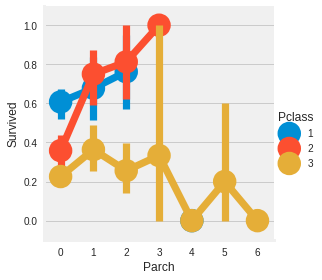

In [71]:
sns.factorplot('Parch','Survived',hue='Pclass',data=train_data)
plt.show()

### Fare

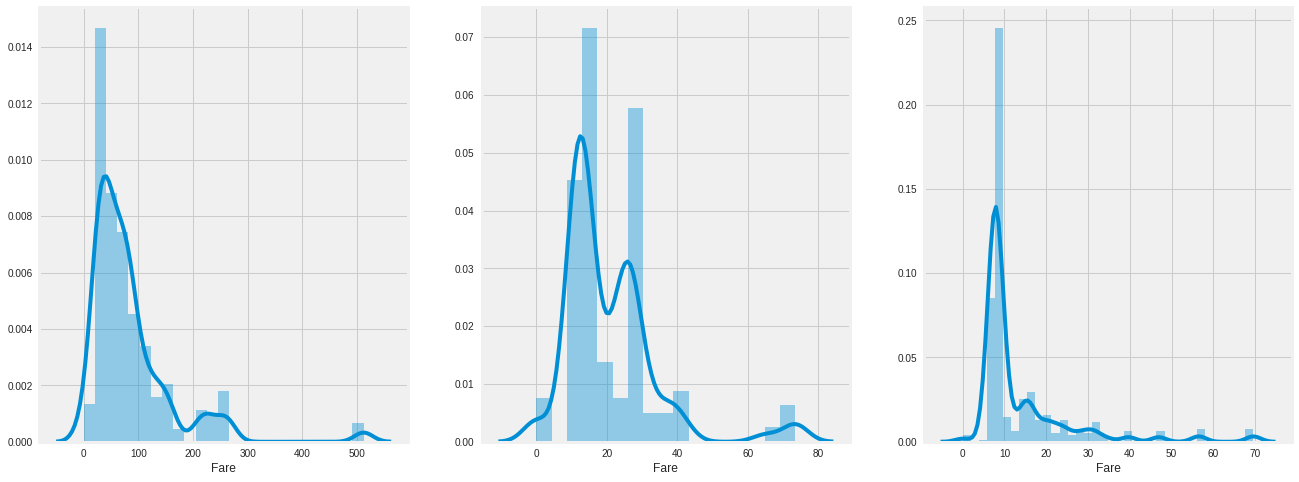

In [73]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(train_data[train_data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(train_data[train_data['Pclass']==3].Fare,ax=ax[2])
plt.show()

### 查看相关性

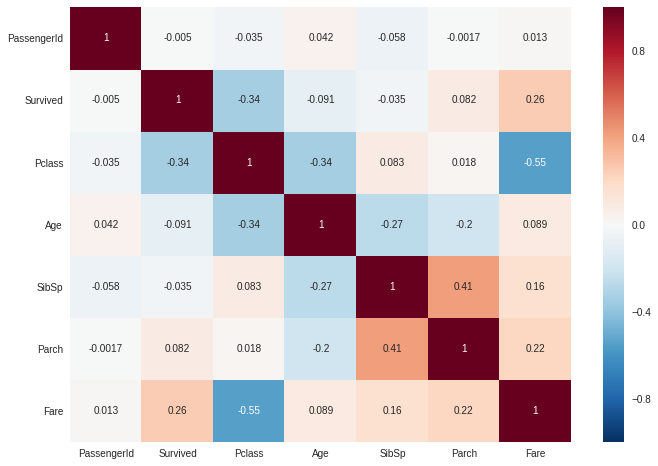

In [79]:
sns.heatmap(train_data.corr(),annot=True)
plt.gcf().set_size_inches(10,8)
# plt.show()

## Part2:Feature Engineering And Data Cleaning

### Age: continous values into categorical values by either Binning or Normalisation.

In [84]:
train_data['Age_band']=0
train_data.loc[train_data['Age']<=16,'Age_band']=0
train_data.loc[(train_data['Age']>16)&(train_data['Age']<=32),'Age_band']=1
train_data.loc[(train_data['Age']>32)&(train_data['Age']<=48),'Age_band']=2
train_data.loc[(train_data['Age']>48)&(train_data['Age']<=64),'Age_band']=3
train_data.loc[train_data['Age']>64,'Age_band']=4
train_data['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

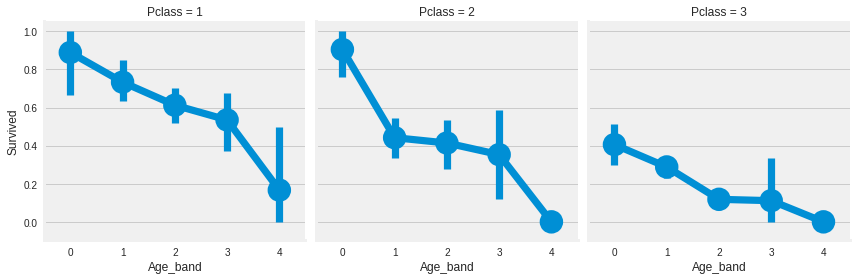

In [88]:
sns.factorplot('Age_band','Survived',col='Pclass',data=train_data)
plt.show()

### 家庭人数

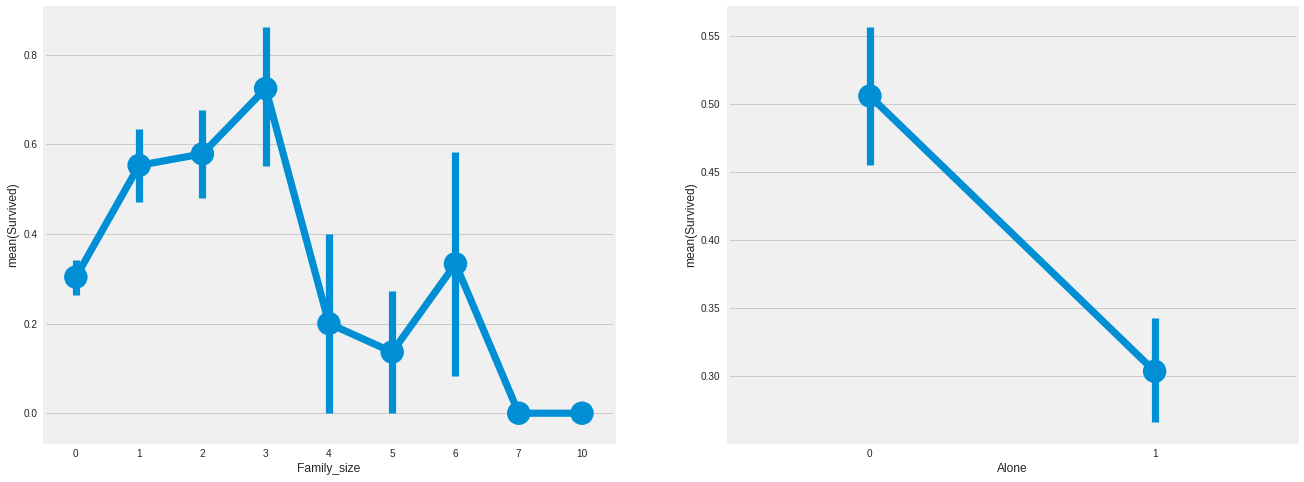

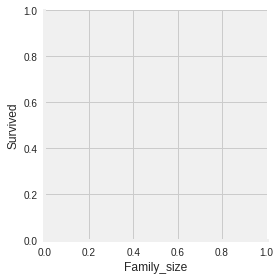

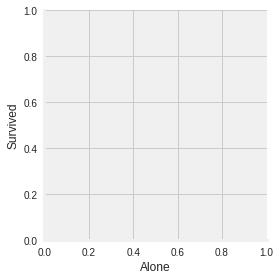

In [92]:
train_data['Family_size']=0
train_data['Alone']=0
train_data['Family_size'] = train_data['SibSp']+train_data['Parch']
train_data.loc[train_data.Family_size==0,'Alone'] = 1
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.factorplot('Family_size','Survived',data=train_data,ax=ax[0])
sns.factorplot('Alone','Survived',data=train_data,ax=ax[1])
plt.show()

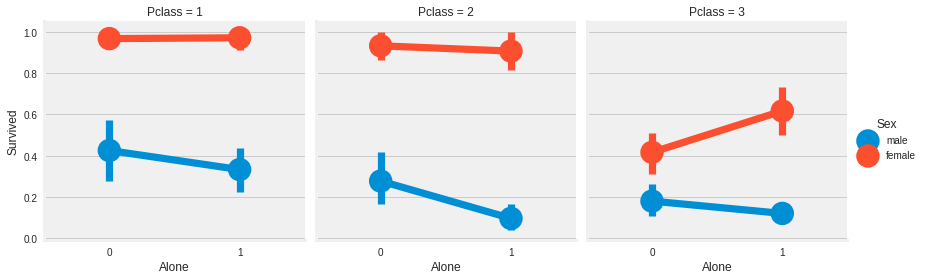

In [94]:
sns.factorplot('Alone','Survived',hue='Sex',col='Pclass',data=train_data)
plt.show()

### 船票也需要分段

In [104]:
train_data['Fare_range']=pd.qcut(train_data['Fare'],4)
train_data['Fare_range'].head()

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
Name: Fare_range, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [105]:
train_data.groupby(['Fare_range'])['Survived'].mean()

Fare_range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [106]:
train_data['Fare_cat']=0
train_data.loc[train_data['Fare']<=7.91,'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=513),'Fare_cat']=3

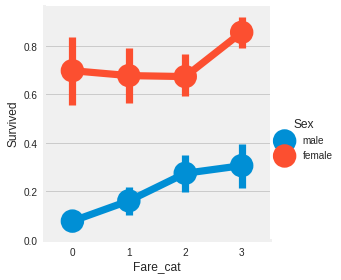

In [107]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=train_data)
plt.show()